<a href="https://colab.research.google.com/github/ilyesBoukraa/soft_SVM/blob/main/Soft_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
# for annotations
import numpy.typing as npt

# Loading the data.

In [46]:
#an overlapped dataset.
X2,y2 = make_blobs(n_samples=100,
                 centers=2,
                 random_state= 0,
                 cluster_std = 1.2)

# Data Visualization.

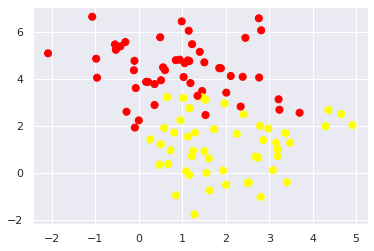

In [47]:
plt.scatter(X2[:,0] ,X2[:,1] , c=y2 , s = 50, cmap = 'autumn' )
plt.show()

### since this dataset is overlapped as we show above, the hard SVM won't separate it effeceintly, therfore we need to implement a soft verion of SVM.

# Main Implementation.

In [52]:
class support_Vector_Machine():
    def __init__(self,X,y, lamda=0.001 , lr=0.1, C=3, iterations=1_000)->None:
        self.X = X
        self.y = y
        # change the classes from 0 & 1 to -1 & 1
        # (original svm works with -1 & 1)*
        self.y[y==0]=-1

        # softness ratio1
        self.lamda = lamda 
        # learning rate(step size)
        self.lr = lr
        # softness ratio2(how much softenes is allowed)
        self.C = C
        self.iterations = iterations
        
        #np.random.seed(777)
        self.w = np.random.random( (X.shape[1] ) )
        self.b = np.random.random( ( 1 ) )
    
    
    # we performed the optimization using gradient_descent
    # we obtained the formulas to do so using a process 
    # called backpropagation.
    def gradient_descent(self)->None:
        for i in range( self.iterations ):
            for j in range(self.X.shape[0]):
                 if( self.y[j]*( self.w.T @ self.X[j] + self.b ) >= 1):
                    self.dLdw = self.lamda * self.w
                    self.dLdb = 0
                 else:
                   self.dLdw = self.lamda * self.w - self.C * self.y[j] * self.X[j] 
                   self.dLdb = -self.C * self.y[j]
                      
                 self.w = self.w - self.lr * self.dLdw
                 self.b = self.b - self.lr * self.dLdb

    # added it for no reason (just to make it sound cool)
    def train(self)->None:
        self.gradient_descent()

        
    def predicted_line(self, axis_range, chosed_line)->npt.NDArray[np.float64]:
        x2 = ( -axis_range*self.w[0] - self.b + chosed_line) / self.w[1]
        return x2

    # used to plot our 3 lines obtained after training
    def predict(self):
        plt.figure(figsize=(10,8))       
        plt.scatter(self.X[:,0] ,self.X[:,1] , c=self.y , s = 50, cmap = 'autumn' )
        x_range = np.arange(-3,5,0.5)
        
        right_line = self.predicted_line(x_range, chosed_line=1)

        middle_line = self.predicted_line(x_range, chosed_line=0)
        

        left_line = self.predicted_line(x_range, chosed_line=-1)
        
        plt.plot(x_range, right_line)
        plt.plot(x_range, middle_line)
        plt.plot(x_range, left_line)

        plt.show()
    

# Final Results.

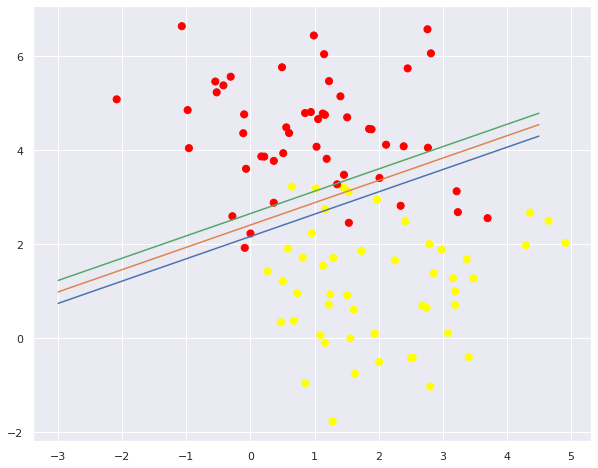

In [53]:
SVM = support_Vector_Machine(X2,y2, lamda=0.001 , lr=0.1, C=3, iterations=1_000)
SVM.train()
SVM.predict()